# Clase 204 - Clasificación

> Machine Learning
>
> [Alan Badillo Salas](mailto:alan@nomadacode.com)
>
> Github: [https://github.com/dragonnomada/ml-2023](https://github.com/dragonnomada/ml-2023)

**Contenido**

* Tipos de clasificación
* Medidas de desempeño
* Análisis de errores
* Reconocimiento de imágenes con Máquinas de Vectores de Soporte
* Clasificación de texto con Naive Bayes
* Hipótesis del Titanic usando árboles de decisión

## Tipos de clasificación


### El problema de la Clasificación

El problema de la clasificación de datos es uno de los dos principales modelos del aprendizaje supervisado.

Este consiste en lograr predecir un objetivo categórico a partir de un conjunto de características numéricas.

Algunos ejemplos de clasificación son:

* Predecir la categoría a la que pertenece un experimento dadas sus características, por ejemplo, si será de tipo A, B, C, etc. Dado sus características como temperatura, humedad, PH, nivel de óxigeno, etc.
* Predecir la categoría SI o NO a la que pertenece un diagnósitico dadas sus características, por ejemplo, si un paciente desarrollará diabetes tipo II dada su presión sanguínea, presión arterial, nivel de azúcar en la sangre en tres muestras distintas, etc.
* Predecir a qué departamento pertenece un producto dadas sus características, por ejemplo, si pertenecerá a ROPA DE CABALLEROS, ROPA DE DAMAS, ROPA DE NIÑOS, ROPA DE NIÑAS o ROPA DE BEBES dado su precio, color, tipo de ropa, talla, etc.
* Predecir si habrá fraude en una tarjeta de crédito dadas las características del cliente, por ejemplo, si habrá o no fraude dado la puntualidad de sus últimos 3 pagos, el monto del crédito, el monto abonado, el límite de crédito, su género, si está casado, si tiene carro, etc.
* Predecir si un correo es SPAM dadas sus características, por ejemplo, determinar si es o no correo no deseado dado el texto de sujeto, el dominio del correo, los caracteres en el nombre del correo, el contenido del correo, el tipo de firma del correo, si contiene números telefónicos, etc.

### Modelo de Clasificación

Para lograr que un Modelo de Clasificación aprenda, necesitamos establecer un conjunto de datos dónde las características sean ejes numéricos y el objetivo sea un eje categórico en formato numérico entero o codificado.

El modelo tomará las características de aprendizaje y los valores objetivos ya entrenados, para así ajustarse a los datos lo mejor posible y poder crear un predictor hacia nuevos valores.

Generalmente podemos ver el problema de clasificación como:

```
# 1. Seleccionamos el modelo de clasificación
#    Por ejemplo, DecisionTreeClassifier, MLPClassifier, SVC, etc.

MODELO <- SELECCIÓN DE MODELO DE CLASIFICACIÓN

# 2. Creamos un clasificador con parámetros de configuración

CLASIFICADOR = MODELO(<parámetros de configuración>)

# 3. Ajustamos el modelo de clasificación a nuestros datos de entrenamiento

CLASIFICADOR.ajustar(X_train, y_train)

# 4. Predecimos nuevos valores para X'

y' = CLASIFICADOR.predecir(X')

# 5. Evaluamos qué tan bien aprendió el clasificador

scores = cross_val_scores(X_test, y_test)
```

Existen diversos clasificadores implementados en la librería de Scikit-Learn que nos permitirán construir un modelo de clasificación, los más importantes se describirán a continuación.

**Clasificadores principales**

* `RidgeClassifier`
* `SGDClassifier`
* `Perceptron`
* `LinearSVC`
* `SVC`
* `KNeighborsClassifier`
* `RadiusKNeighborsClassifier`
* `BernoulliNB`
* `GaussianNB`
* `DecisionTreeClassifier`
* `MLPClassifier`

### Cargar un dataset de Scikit-Learn

La librería Scikit-Learn dispone de muchos conjuntos de datos precargados que podemos utilizar para probar nuestros clasificadores, en la siguiente lista se muestran los más importantes y su tipo de aprendizaje.

> Documentación [sklearn.datasets](https://scikit-learn.org/stable/datasets.html)

| Nombre | Función | Tipo | Muestras | Características | Objetivo | Descripción |
| --- | --- | --- | :-: | :-: | --- | --- |
| Iris | `datasets.load_iris(*[, return_X_y, as_frame])` |  `Clasificación` | 150 | 4 | `1-Categórico (3)` | Muestras de flores iris para clasificar la familia |
| Diabetes | `datasets.load_diabetes(*[, return_X_y, ...])` | `Regresión` | 442 | 10 | `1-Continuo` | Muestras de diabetes y para predecir el progreso de enfermedad |
| Dígitos | `datasets.load_digits(*[, n_class, ...])` | `Clasificación` | 1797 | 64 | `1-Categórico (10)` | Muestras de de dígitos escritos a mano de 8x8 pixeles en el rango de $[1, 16]$ |
| Linnerud | `datasets.load_linnerud(*[, return_X_y, as_frame])` | `Regresión Múltiple` | 20 | 3 | `3-Continuo` | Muestras de medidas de 3 ejercicios para predecir 3 rasgos fisiológicos. |
| Wine | `datasets.load_wine(*[, return_X_y, as_frame])` | `Clasificación` | 178 | 13 | `1-Categórico (3)` | Muestras de vinos para clasificar la casa |
| Breast Cancer | `datasets.load_breast_cancer(*[, return_X_y, ...])` | `Clasificación` | 569 | 30 | `1-Categórico (Binario)` | Muestras de cáncer para clasificar si es benigno o maligno |
| Olivetti Faces | `datasets.fetch_olivetti_faces(*[, ...])` | `Clasificación` | 400 | 4096 | `1-Categórico (40)` | Muestras de rostros en imágenes de 64x64 pixeles en el rango de $[0.0, 1.0]$ tomadas por el laboratio de AT&T |
| 20 News Groups | `datasets.fetch_20newsgroups(*[, data_home, ...])` | `Clasificación` | 18846 | 1 (Texto) | `1-Categórico (20)` | Muestras de noticias en texto, para predecir el grupo al que pertenece
| 20 News Groups Vectorized | `datasets.fetch_20newsgroups_vectorized(*[, ...])` | `Clasificación` | 18846 | 34118 | `1-Categórico (20)` | Muestras de noticias en texto, vectorizadas en 34,118 características para predecir el grupo al que pertenece
| Labeled Faces in the Wild (Parejas) | `datasets.fetch_lfw_pairs(*[, subset, ...])` | `Clasificación` | 13233 | 5828 | `1-Categórico (5749)` | Muestras de rostros de gente recolectada de internet para clasificar de qué persona se trata |
| Labeled Faces in the Wild (Personas)| `datasets.fetch_lfw_people(*[, data_home, ...])` | `Clasificación` | 13233 | 5828 | `1-Categórico (2)` | Muestras de rostros de gente recolectada de internet para clasificar si dos rostros son de la misma persona |
| Forest Cover Type | `datasets.fetch_covtype(*[, data_home, ...])` | `Clasificación` | 581012 | 54 | `1-Categórico (7)` | Muestras de tipo de terreno en un bosque de 30x30 metros para clasificar el tipo de covertura |
| Reuters Corpus Volume I | `datasets.fetch_rcv1(*[, data_home, subset, ...])` | `Clasificación` | 804414 | 47236 | `103-Categórico (Bin-Sparse)` | Publicaciones de Routers para clasificar la categoría |
| KDD Cup '99 (DARPA Intrusion Detection) | `datasets.fetch_kddcup99(*[, subset, ...])` | `Clasificación` | 4898431 | 41 | `1-Categórico (2)` | Muestras de simulaciones de ataque TCP del campeonato KDD Cup '99 para clasificar comportamiento normal o anormal |
| California Housing | `datasets.fetch_california_housing(*[, ...])` | `Regresión` | 20640 | 8 | `1-Continuo` | Muestras de casas de California para predecir el valor de la casa |

### Ejemplo de la Carga del Dataset de Cáncer

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

dataset = load_breast_cancer()

data = pd.DataFrame(dataset.data)

data.columns = dataset.feature_names

data[dataset.target_names[0]] = dataset.target

data.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
322,12.860,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,0.1543,0.06476,...,21.08,92.80,599.5,0.1547,0.2231,0.17910,0.11550,0.2382,0.08553,1
439,14.020,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,19.31,96.53,688.9,0.1034,0.1017,0.06260,0.08216,0.2136,0.06710,1
66,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.01504,0.1717,0.06899,...,31.56,67.03,330.7,0.1548,0.1664,0.09412,0.06517,0.2878,0.09211,1
413,14.990,22.11,97.53,693.7,0.08515,0.10250,0.06859,0.03876,0.1944,0.05913,...,31.55,110.20,867.1,0.1077,0.3345,0.31140,0.13080,0.3163,0.09251,1
187,11.710,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.03239,0.1516,0.06095,...,21.39,84.42,521.5,0.1323,0.1040,0.15210,0.10990,0.2572,0.07097,1


### Ejemplo de la partición del Dataset en Entrenamiento y Pruebas

Podemos partir el conjunto de datos en dos subconjuntos para hacer el entrenamiento adecuadamente. Esto permitirá tener muestras aleatorias divididas entre entrenamiento y pruebas.

Los datos de entrenamiento serán utilizados para entrenar el modelo, mientras que los datos de pruebas quedarán reservados del entrenamiento, para validar el desempeño del modelo.

> Documentación: [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
# Importamos la función para partir el conjunto original
from sklearn.model_selection import train_test_split
import numpy as np

X = dataset.data
y = dataset.target

# Obtenemos las matrices de entrenamiento y pruebas
# y los vectores de entrenamiento y pruebas
# Tomamos 25% de los datos para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Dimensión de las características conjunto original
# 569 muestras en 30 características
X.shape

(569, 30)

In [ ]:
# Dimensión de las características conjunto de entrenamiento
# 426 muestras (~75%) en 30 características
X_train.shape

(426, 30)

In [ ]:
# Dimensión de las características conjunto de prueba
# 426 muestras (~25%) en 30 características
X_test.shape

(143, 30)

In [ ]:
# Lo mismo para el objetivo original, de entrenamiento y de prueba
y.shape, y_train.shape, y_test.shape

((569,), (426,), (143,))

### Ejercicio: E217 - Cargar los datos del Dataset Iris

1. Importa la función `load_iris`

    PISTA: `from sklearn.datasets import load_iris`
    
2. Carga los datos en la variable `iris`

    PISTA: `iris = load_iris()`

3. Recupera la matriz de características de `iris`

    PISTA: `data = iris.data`

4. Recupera el nombre de las características de `iris`

    PISTA: `feature_names = iris.feature_names`

5. Recupera el vector objetivo de `iris`

    PISTA: `target = iris.target`

6. Recupera las clases del objetivo de `iris`

    PISTA: `target_names = iris.target_names`

7. Muestra los primeros 5 valores de la matriz de características `data`

    PISTA: `data[:5]`

8. Muestra el nombre de las características `feature_names`

    PISTA: `feature_names`

9. Muestra los primeros 5 valores del vector de objetivos `target`

    PISTA: `target[:5]`

10. Muestra el nombre de las clases del objetivo

    PISTA: `target_names`

In [ ]:
# E217 - SOLUCIÓN AQUÍ

### Ejercicio: E218 - Partir los datos del Dataset Iris

Forma la matriz $X$ y el vector $y$ del conjunto de datos del Iris.

Genera las matrices $X_{train}$ y $X_{test}$ y los vectores $y_{train}$ y $y_{test}$.

In [ ]:
# E218 - SOLUCIÓN AQUÍ

### 1. RidgeClassifier

> [sklearn.linear_model.RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)

**Descripción**

Está basado en la regresión de *Ridge* la cual considera una regulación en los pesos dado un factor $α$ al hacer la minimización de los mínimos cuadrados.

> Rregresión de *Ridge*

$\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$

La clasificación considera el objetivo como valores entre $(-1, 1)$ y lo resuelve como un problema de regresión.

Puede ser usado cuándo el objetivo acepta dos valores o un rango ordenado.

**Parámetros principales**

* `alpha = 1.0` - Representa el parámetro $α$ de ajuste para la regresión de tipo Ridge.
* `solver = 'auto'` - Determina la técnica de optimización utilizada, algunas posibilidades son: `{'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}`.

**Funciones principales**

* `.fit(X_train, y_train)` - Ajusta el clasificador a las características y el objetivo de entrenamiento.
* `.decision_function(X_test)` - Predice la confianza de las muestras de prueba.
* `.score(X_test, y_test)` - Devuelve la precisión media de los ejemplos de prueba.
* `.predict(X)` - Devuelve las predicciones objetivo clasificadas sobre las características.

### Ejemplo de RidgeClassifier

Veamos como funciona el clasificador *RidgeClassifier* en el conjunto de datos del Cáncer de Mama.

ESTUDIO DEL CÁNCER DE MAMA MEDIANTE CON UN CLASIFICADOR RIDGE
----------------------------------------------------------------------
Características:                  (569, 30)
Objetivos:                        (569,)
----------------------------------------------------------------------
Componentes Principales:          (569, 2)
----------------------------------------------------------------------


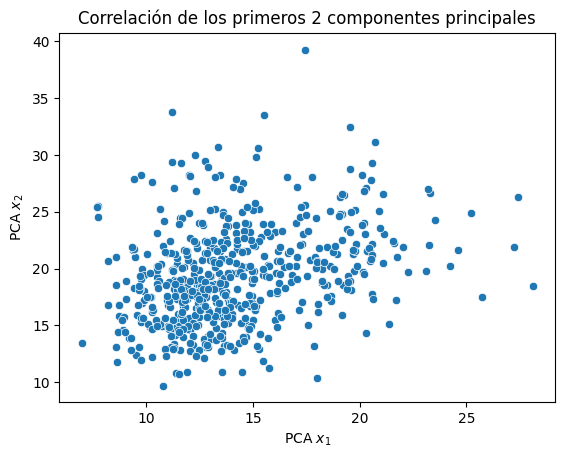

----------------------------------------------------------------------
Correlación PCA(2):                0.323781890927733
>>> LA CORRELACIÓN PRINCIPAL ES DIRECTA
!!! LA CORRELACIÓN PRINCIPAL ES INSUFICIENTE
----------------------------------------------------------------------
Catacterísticas de Entrenamiento:  (455, 30)
Características de Prueba:         (114, 30)
Objetivos de Entrenamiento:        (455,)
Objetivos de Prueba:               (114,)
----------------------------------------------------------------------
Modelo de Aprendizaje:             RidgeClassifier()
PRECISIÓN:                         0.956140350877193
>>> LA PRECISIÓN DE APRENDIZAJE ES ALTA
----------------------------------------------------------------------
Muestra aleatoria:               85
Valor de las Características:
   mean radius              :    14.42
   mean texture             :    16.54
   mean perimeter           :    94.15
   mean area                :    641.2
   mean smoothness          :    0.0

In [ ]:
#
# Conjunto de datos: Cáncer de Mama
# URL: https://scikit-learn.org/stable/datasets/toy_dataset.html
#
# Tipo de Aprendizaje: Supervizado
# Objetivo de Aprendizaje: Clasificación
#
# Modelo de Aprendizaje: RidgeClassifier
#
# Descripción:
# Se busca encontrar si dadas 30 características sobre la mastografía,
# será benigno o maligno.
#
# Alan Badillo Salas (alan@nomadacode.com)
# 23 de junio de 2023
#

print("ESTUDIO DEL CÁNCER DE MAMA MEDIANTE CON UN CLASIFICADOR RIDGE")

# 1. Importación del Dataset
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

# Matriz de características
X = dataset.data
# Vector de objetivos
y = dataset.target

print("-" * 70)
print("Características:                  {}".format(X.shape))
print("Objetivos:                        {}".format(y.shape))

# 2. Obtenemos los ejes principales de máxima varianza, es decir,
#    de los primeros dos componentes principales usando PCA
from sklearn.decomposition import PCA
import pandas as pd

Xd = PCA(n_components=2).fit_transform(X)

x1 = pd.Series(X[:,0])
x2 = pd.Series(X[:,1])

print("-" * 70)
print("Componentes Principales:          {}".format(Xd.shape))

# 3. Creamos una visualización de la correlación entre
#    los primeros dos componentes principales usando PCA
import matplotlib.pyplot as plt
import seaborn as sns

print("-" * 70)
sns.scatterplot(x=x1, y=x2)

plt.xlabel("PCA $x_1$")
plt.ylabel("PCA $x_2$")
plt.title("Correlación de los primeros 2 componentes principales")
plt.show()

# 4. Mostramos la correlación empírica entre
#    los primeros dos componentes principales usando PCA
print("-" * 70)
print("Correlación PCA(2):                {}".format(x1.corr(x2)))

if x1.corr(x2) >= 0:
  print(">>> LA CORRELACIÓN PRINCIPAL ES DIRECTA")
else:
  print(">>> LA CORRELACIÓN PRINCIPAL ES INVERSA")

if abs(x1.corr(x2)) >= 0.9:
  print(">>> LA CORRELACIÓN PRINCIPAL ES ALTA")
else:
  print("!!! LA CORRELACIÓN PRINCIPAL ES INSUFICIENTE")

## 5. Partimos los datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

print("-" * 70)
print("Catacterísticas de Entrenamiento:  {}".format(X_train.shape))
print("Características de Prueba:         {}".format(X_test.shape))
print("Objetivos de Entrenamiento:        {}".format(y_train.shape))
print("Objetivos de Prueba:               {}".format(y_test.shape))

## 6. Creamos un modelo de aprendizaje supervisado para la clasificación
##    de tipo RidgeClassifier
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()

print("-" * 70)
print("Modelo de Aprendizaje:             {}".format(model))

## 7. Entrenamos el modelo de aprendizaje a nuestros datos de entrenamiento
##    y calculamos la precisión del aprendizaje a los datos de prueba
model.fit(X_train, y_train)

score = model.score(X_test, y_test)

print("PRECISIÓN:                         {}".format(score))

if score >= 0.9:
  print(">>> LA PRECISIÓN DE APRENDIZAJE ES ALTA")
else:
  print("!!! LA PRECISIÓN DE APRENDIZAJE ES INSUFICIENTE")

# 8. Hacemos la predicción para una muestra aleatoria del conjunto de pruebas
import numpy as np

index = np.random.randint(0, len(X_test))

x_sample = X_test[index,:]
y_sample = y_test[index]

y_predict = model.predict([x_sample])[0]

print("-" * 70)
print("Muestra aleatoria:               {}".format(index))
print("Valor de las Características:".format(x_sample))
for i, label in enumerate(dataset.feature_names):
  print("   {:25}:    {}".format(label, x_sample[i]))
print("Valor del Objetivo:              {}".format(y_sample))
print("Valor de predicción:             {}".format(y_predict))

if y_sample == y_predict:
  print(">>> LA PREDICCIÓN ES CORRECTA")
else:
  print(">>> LA PREDICCIÓN ES INCORRECTA")

### 2. SGDClassifier

> [sklearn.linear_model.SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

**Descripción**

Está basado en las Máquinas de Soporte Vectorial Lineal y la regresión Logística, utilizando el método Estocástico de Descenso de Gradiente para la función de pérdida heredada, por ejemplo, máquina de soporte vectorial (`hinge`) o regresión logística (`log_loss`).

> Máquina de Soporte Vectorial Lineal

${\displaystyle {\begin{aligned}&{\underset {\mathbf {w} ,\;b}{\operatorname {minimize} }}&&\|\mathbf {w} \|_{2}^{2}\\&{\text{subject to}}&&y_{i}(\mathbf {w} ^{\top }\mathbf {x} _{i}-b)\geq 1\quad \forall i\in \{1,\dots ,n\}\end{aligned}}}$

> Regresión Logística

${\displaystyle p(x)={\frac {1}{1+e^{-(\beta _{0}+\beta _{1}x)}}}}$

La clasificación considera el objetivo como valores entre $(0, 1)$ y lo resuelve como un problema de regresión, también depende de la escala de las características, por lo que hay que normalizarlas.

Puede ser usado cuándo el objetivo es $0$ o es $1$ y las características están normalizadas.

**Parámetros principales**

* `loss = hinge` - Representa la función de pérdida que será usada para ajustar el clasificador, si es `hinge` usará máquinas de soporte vectorial lineales, y si es `log_loss` usará regresión logística. Algunas posibilidades son: `{'hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'}`
* `penalty = 'l2'` - Define el tipo de penalización usada en máquina de soporte vectorial, algunas posibilidades son: `{'l2', 'l1', 'elasticnet', None}`
* `l1_ratio = 0.15` - Cuando la penalización es de tipo ElasticNet podemos elegir entre $[0.0, 1.0]$ donde $0.0$ representaría una penalización $L_2$ y $1.0$ una penalización $L_1$.
* `alpha = 0.0001` - Representa el parámetro $α$ de penalización constante en el intervalo de $[0.0, ∞)$.
* `max_iter = 1000` - Representa el máximo de épocas que se repetirá la optimización.

**Funciones principales**

* `.fit(X_train, y_train)` - Ajusta el clasificador a las características y el objetivo de entrenamiento.
* `.partial_fit(X_train, y_train)` - Ajusta el clasificador a las características y el objetivo de entrenamiento, en un solo paso del descenso.
* `.decision_function(X_test)` - Predice la confianza de las muestras de prueba.
* `.densify()` - Convierte los coeficientes en una matriz densa.
* `.predict_log_proba(X_test)` - Cuando la función de pérdida es logarítmica predice la pobabilidad logarítimica.
* `.predict_proba(X_test)` - Cuando la función de pérdida es logarítmica predice la pobabilidad.
* `.score(X_test, y_test)` - Devuelve la precisión media de los ejemplos de prueba.
* `.predict(X)` - Devuelve las predicciones objetivo clasificadas sobre las características.

### Ejemplo de SGDClassifier

Veamos como funciona el clasificador *SGDClassifier* en el conjunto de datos del Cáncer de Mama.

ESTUDIO DEL CÁNCER DE MAMA MEDIANTE CON UN CLASIFICADOR SGD
----------------------------------------------------------------------
Características:                  (569, 30)
Objetivos:                        (569,)
----------------------------------------------------------------------
Componentes Principales:          (569, 2)
----------------------------------------------------------------------


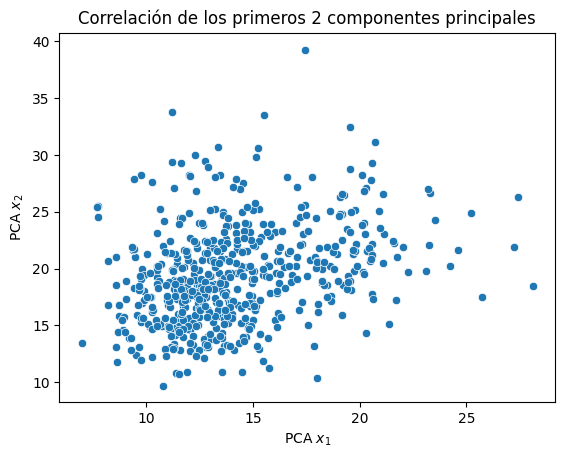

----------------------------------------------------------------------
Correlación PCA(2):                0.323781890927733
>>> LA CORRELACIÓN PRINCIPAL ES DIRECTA
!!! LA CORRELACIÓN PRINCIPAL ES INSUFICIENTE
----------------------------------------------------------------------
Catacterísticas de Entrenamiento:  (455, 30)
Características de Prueba:         (114, 30)
Objetivos de Entrenamiento:        (455,)
Objetivos de Prueba:               (114,)
----------------------------------------------------------------------
Modelo de Aprendizaje:             Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])
PRECISIÓN:                         0.956140350877193
>>> LA PRECISIÓN DE APRENDIZAJE ES ALTA
----------------------------------------------------------------------
Muestra aleatoria:               8
Valor de las Características:
   mean radius              :    10.18
   mean texture             :    17.53
   mean perimeter         

In [ ]:
#
# Conjunto de datos: Cáncer de Mama
# URL: https://scikit-learn.org/stable/datasets/toy_dataset.html
#
# Tipo de Aprendizaje: Supervizado
# Objetivo de Aprendizaje: Clasificación
#
# Modelo de Aprendizaje: SGDClassifier
#
# Descripción:
# Se busca encontrar si dadas 30 características sobre la mastografía,
# será benigno o maligno.
#
# Alan Badillo Salas (alan@nomadacode.com)
# 23 de junio de 2023
#

print("ESTUDIO DEL CÁNCER DE MAMA MEDIANTE CON UN CLASIFICADOR SGD")

# 1. Importación del Dataset
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

# Matriz de características
X = dataset.data
# Vector de objetivos
y = dataset.target

print("-" * 70)
print("Características:                  {}".format(X.shape))
print("Objetivos:                        {}".format(y.shape))

# 2. Obtenemos los ejes principales de máxima varianza, es decir,
#    de los primeros dos componentes principales usando PCA
from sklearn.decomposition import PCA
import pandas as pd

Xd = PCA(n_components=2).fit_transform(X)

x1 = pd.Series(X[:,0])
x2 = pd.Series(X[:,1])

print("-" * 70)
print("Componentes Principales:          {}".format(Xd.shape))

# 3. Creamos una visualización de la correlación entre
#    los primeros dos componentes principales usando PCA
import matplotlib.pyplot as plt
import seaborn as sns

print("-" * 70)
sns.scatterplot(x=x1, y=x2)

plt.xlabel("PCA $x_1$")
plt.ylabel("PCA $x_2$")
plt.title("Correlación de los primeros 2 componentes principales")
plt.show()

# 4. Mostramos la correlación empírica entre
#    los primeros dos componentes principales usando PCA
print("-" * 70)
print("Correlación PCA(2):                {}".format(x1.corr(x2)))

if x1.corr(x2) >= 0:
  print(">>> LA CORRELACIÓN PRINCIPAL ES DIRECTA")
else:
  print(">>> LA CORRELACIÓN PRINCIPAL ES INVERSA")

if abs(x1.corr(x2)) >= 0.9:
  print(">>> LA CORRELACIÓN PRINCIPAL ES ALTA")
else:
  print("!!! LA CORRELACIÓN PRINCIPAL ES INSUFICIENTE")

## 5. Partimos los datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

print("-" * 70)
print("Catacterísticas de Entrenamiento:  {}".format(X_train.shape))
print("Características de Prueba:         {}".format(X_test.shape))
print("Objetivos de Entrenamiento:        {}".format(y_train.shape))
print("Objetivos de Prueba:               {}".format(y_test.shape))

## 6. Creamos un modelo de aprendizaje supervisado para la clasificación
##    de tipo SGDClassifier
from sklearn.linear_model import SGDClassifier

# Nota: El modelo Stochastic Gradient Descent requiere que los datos estén
#       normalizados para no verse afectados por la dimension de las
#       características. Esto lo conseguimos armando un Pipeline
#       que preprocese los datos antes de dárselos al modelo

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# 6.1 Generamos un Pipeline que preprocese los datos antes de dárselos al modelo
# Para que los normalice (los escale y sean adimensionales)
model = make_pipeline(
    StandardScaler(),
    SGDClassifier()
)

print("-" * 70)
print("Modelo de Aprendizaje:             {}".format(model))

## 7. Entrenamos el modelo de aprendizaje a nuestros datos de entrenamiento
##    y calculamos la precisión del aprendizaje a los datos de prueba
model.fit(X_train, y_train)

score = model.score(X_test, y_test)

print("PRECISIÓN:                         {}".format(score))

if score >= 0.9:
  print(">>> LA PRECISIÓN DE APRENDIZAJE ES ALTA")
else:
  print("!!! LA PRECISIÓN DE APRENDIZAJE ES INSUFICIENTE")

# 8. Hacemos la predicción para una muestra aleatoria del conjunto de pruebas
import numpy as np

index = np.random.randint(0, len(X_test))

x_sample = X_test[index,:]
y_sample = y_test[index]

y_predict = model.predict([x_sample])[0]

print("-" * 70)
print("Muestra aleatoria:               {}".format(index))
print("Valor de las Características:".format(x_sample))
for i, label in enumerate(dataset.feature_names):
  print("   {:25}:    {}".format(label, x_sample[i]))
print("Valor del Objetivo:              {}".format(y_sample))
print("Valor de predicción:             {}".format(y_predict))

if y_sample == y_predict:
  print(">>> LA PREDICCIÓN ES CORRECTA")
else:
  print(">>> LA PREDICCIÓN ES INCORRECTA")

### 3. Perceptron

> [sklearn.linear_model.Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

**Descripción**

Está basado en el Perceptrón o Neurona Única, capaz de tomar las características, una función de activación y generar una salidad acorde a la función de activación.

> Actualización de pesos en el Perceptrón

$w(j)'=w(j)+\alpha (\delta -y)x(j)$

La clasificación considera el objetivo como valores entre $(0, 1)$ y lo resuelve como un problema de regresión.

Puede ser usado cuándo el objetivo es $0$ o es $1$.

**Parámetros principales**

* `penalty = 'l2'` - Define el tipo de penalización usada en máquina de soporte vectorial, algunas posibilidades son: `{'l2', 'l1', 'elasticnet', None}`
* `l1_ratio = 0.15` - Cuando la penalización es de tipo ElasticNet podemos elegir entre $[0.0, 1.0]$ donde $0.0$ representaría una penalización $L_2$ y $1.0$ una penalización $L_1$.
* `alpha = 0.0001` - Representa el parámetro $α$ de penalización constante en el intervalo de $[0.0, ∞)$.
* `max_iter = 1000` - Representa el máximo de épocas que se repetirá la optimización.

**Funciones principales**

* `.fit(X_train, y_train)` - Ajusta el clasificador a las características y el objetivo de entrenamiento.
* `.partial_fit(X_train, y_train)` - Ajusta el clasificador a las características y el objetivo de entrenamiento, en un solo paso del descenso.
* `.decision_function(X_test)` - Predice la confianza de las muestras de prueba.
* `.densify()` - Convierte los coeficientes en una matriz densa.
* `.score(X_test, y_test)` - Devuelve la precisión media de los ejemplos de prueba.
* `.predict(X)` - Devuelve las predicciones objetivo clasificadas sobre las características.

### Ejemplo de Perceptron

Veamos como funciona el clasificador *Perceptron* en el conjunto de datos del Cáncer de Mama.

ESTUDIO DEL CÁNCER DE MAMA MEDIANTE CON UN CLASIFICADOR PERCEPTRON
----------------------------------------------------------------------
Características:                  (569, 30)
Objetivos:                        (569,)
----------------------------------------------------------------------
Componentes Principales:          (569, 2)
----------------------------------------------------------------------


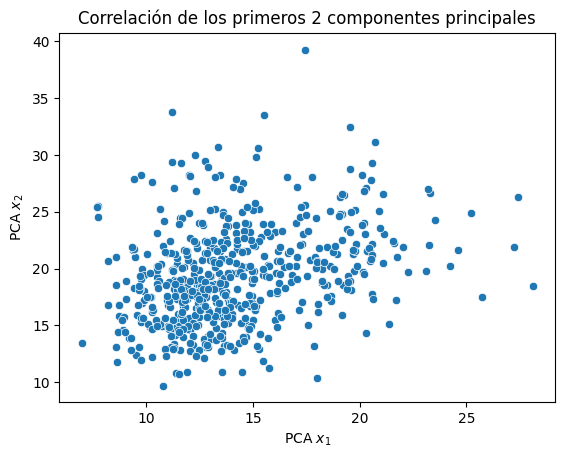

----------------------------------------------------------------------
Correlación PCA(2):                0.323781890927733
>>> LA CORRELACIÓN PRINCIPAL ES DIRECTA
!!! LA CORRELACIÓN PRINCIPAL ES INSUFICIENTE
----------------------------------------------------------------------
Catacterísticas de Entrenamiento:  (455, 30)
Características de Prueba:         (114, 30)
Objetivos de Entrenamiento:        (455,)
Objetivos de Prueba:               (114,)
----------------------------------------------------------------------
Modelo de Aprendizaje:             Perceptron()
PRECISIÓN:                         0.8596491228070176
!!! LA PRECISIÓN DE APRENDIZAJE ES INSUFICIENTE
----------------------------------------------------------------------
Muestra aleatoria:               89
Valor de las Características:
   mean radius              :    12.54
   mean texture             :    16.32
   mean perimeter           :    81.25
   mean area                :    476.3
   mean smoothness          :   

In [47]:
#
# Conjunto de datos: Cáncer de Mama
# URL: https://scikit-learn.org/stable/datasets/toy_dataset.html
#
# Tipo de Aprendizaje: Supervizado
# Objetivo de Aprendizaje: Clasificación
#
# Modelo de Aprendizaje: Perceptron
#
# Descripción:
# Se busca encontrar si dadas 30 características sobre la mastografía,
# será benigno o maligno.
#
# Alan Badillo Salas (alan@nomadacode.com)
# 23 de junio de 2023
#

print("ESTUDIO DEL CÁNCER DE MAMA MEDIANTE CON UN CLASIFICADOR PERCEPTRON")

# 1. Importación del Dataset
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

# Matriz de características
X = dataset.data
# Vector de objetivos
y = dataset.target

print("-" * 70)
print("Características:                  {}".format(X.shape))
print("Objetivos:                        {}".format(y.shape))

# 2. Obtenemos los ejes principales de máxima varianza, es decir,
#    de los primeros dos componentes principales usando PCA
from sklearn.decomposition import PCA
import pandas as pd

Xd = PCA(n_components=2).fit_transform(X)

x1 = pd.Series(X[:,0])
x2 = pd.Series(X[:,1])

print("-" * 70)
print("Componentes Principales:          {}".format(Xd.shape))

# 3. Creamos una visualización de la correlación entre
#    los primeros dos componentes principales usando PCA
import matplotlib.pyplot as plt
import seaborn as sns

print("-" * 70)
sns.scatterplot(x=x1, y=x2)

plt.xlabel("PCA $x_1$")
plt.ylabel("PCA $x_2$")
plt.title("Correlación de los primeros 2 componentes principales")
plt.show()

# 4. Mostramos la correlación empírica entre
#    los primeros dos componentes principales usando PCA
print("-" * 70)
print("Correlación PCA(2):                {}".format(x1.corr(x2)))

if x1.corr(x2) >= 0:
  print(">>> LA CORRELACIÓN PRINCIPAL ES DIRECTA")
else:
  print(">>> LA CORRELACIÓN PRINCIPAL ES INVERSA")

if abs(x1.corr(x2)) >= 0.9:
  print(">>> LA CORRELACIÓN PRINCIPAL ES ALTA")
else:
  print("!!! LA CORRELACIÓN PRINCIPAL ES INSUFICIENTE")

## 5. Partimos los datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

print("-" * 70)
print("Catacterísticas de Entrenamiento:  {}".format(X_train.shape))
print("Características de Prueba:         {}".format(X_test.shape))
print("Objetivos de Entrenamiento:        {}".format(y_train.shape))
print("Objetivos de Prueba:               {}".format(y_test.shape))

## 6. Creamos un modelo de aprendizaje supervisado para la clasificación
##    de tipo Perceptron
from sklearn.linear_model import Perceptron

model = Perceptron()

print("-" * 70)
print("Modelo de Aprendizaje:             {}".format(model))

## 7. Entrenamos el modelo de aprendizaje a nuestros datos de entrenamiento
##    y calculamos la precisión del aprendizaje a los datos de prueba
model.fit(X_train, y_train)

score = model.score(X_test, y_test)

print("PRECISIÓN:                         {}".format(score))

if score >= 0.9:
  print(">>> LA PRECISIÓN DE APRENDIZAJE ES ALTA")
else:
  print("!!! LA PRECISIÓN DE APRENDIZAJE ES INSUFICIENTE")

# 8. Hacemos la predicción para una muestra aleatoria del conjunto de pruebas
import numpy as np

index = np.random.randint(0, len(X_test))

x_sample = X_test[index,:]
y_sample = y_test[index]

y_predict = model.predict([x_sample])[0]

print("-" * 70)
print("Muestra aleatoria:               {}".format(index))
print("Valor de las Características:".format(x_sample))
for i, label in enumerate(dataset.feature_names):
  print("   {:25}:    {}".format(label, x_sample[i]))
print("Valor del Objetivo:              {}".format(y_sample))
print("Valor de predicción:             {}".format(y_predict))

if y_sample == y_predict:
  print(">>> LA PREDICCIÓN ES CORRECTA")
else:
  print(">>> LA PREDICCIÓN ES INCORRECTA")

### Ejercicio: E219

Realiza el estudio de cáncer de mama, usando el modelo de aprendizaje supervisado para la clasificación [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

Resuelve las siguientes preguntas:

1. ¿Cuál es la precisión de aprendizaje en 3 ejecuciones?
2. Modifica el `MLPClassifier()` con los parámetros `MLPClassifier(hidden_layer_size=(20,),activation='logistic')`. ¿Cuál es la precisión de aprendizaje en 3 ejecuciones

## Medidas de desempeño

### Métricas de desempeño

El problema de la clasificación implica predecir la etiqueta u objetivo a partir de las características, por lo que disponemos de diversas métricas que nos ayudarán a entender qué también se logró el aprendizaje.

A continuación se listan las métricas más importantes que podemos utilizar para evaluar el desempeño de nuestro clasificador.

> [sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

Evalua el desempeño de la clasificación entre las muestras de prueba y las predicciones basado en el porcentaje de aciertos.

> Ejemplo de uso

`accuracy_score(y_test, y_pred)`

> [sklearn.metrics.precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)

Obtiene la presición entre los verdaderos positivos, respecto a los falsos positivos en el intervalo de $[0.0, 1.0]$ donde $0.0$ es el peor y $1.0$ el mejor, utilizando un método para calcular el promedio que puede ser `{'binary', 'micro', 'macro', 'weighted', 'samples'}` por defecto `'binary'`.

> Ecuación de precisión entre verdaderos positivos y falsos positivos

$p = \frac{T_p}{T_p + F_p}$

> Ejemplo de uso

`precision_score(y_test, y_pred, average='binary')`

> [sklearn.metrics.recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

Obtiene la reiteración o medida de éxito entre los verdaderos positivos, respecto a los falsos negativos en el intervalo de $[0.0, 1.0]$ donde $0.0$ es el peor y $1.0$ el mejor, utilizando un método para calcular el promedio que puede ser `{'binary', 'micro', 'macro', 'weighted', 'samples'}` por defecto `'binary'`.

> Ecuación de la medida de éxito entre verdaderos positivos y falsos negativos

$r = \frac{T_p}{T_p + F_n}$

> Ejemplo de uso

`recall_score(y_test, y_pred, average='binary')`

> [sklearn.metrics.f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

Obtiene el indicador $F_1$ entre la precisión y la medida de éxito en el intervalo de $[0.0, 1.0]$ donde $0.0$ es el peor y $1.0$ el mejor, utilizando un método para calcular el promedio que puede ser `{'binary', 'micro', 'macro', 'weighted', 'samples'}` por defecto `'binary'`.

> Ecuación del indicador $F_1$

$F_1 = 2 \cdot \frac{p \cdot r}{p + r}$

> Ejemplo de uso

`f1_score(y_test, y_pred, average='binary')`

> [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

Genera un reporte con la presición, medida de éxito, el indicador $F_1$ y el soporte para cada clase.

> Ejemplo de uso

`classification_report(y_test, y_pred, target_names=target_names)`

> [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Genera la matriz de confunsión para cuando las clases de prueba aparecen respecto a las clases de predicción, formando una matriz de `n-clases` por `n-clases`, donde la fila `i` y columna `j` representan cuántos ejemplos hay de la clase `i` en la prueba respecto a la clase `j` en la predicción. Si la matriz es diagonal, significaría que no hay confusión.

> Ejemplo de uso

`confusion_matrix(y_test, y_pred)`

> Ejemplo de uso en caso que las clases sean binarias `0` o `1`

`tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()`

## Análisis de errores

### Comparación entre clasificadores binarios

Para analizar los errores entre clasificadores, podemos construir una curva tipo *Receiver Operating Characteristic (ROC)* que mida la razón entre los verdaderos positivos contra los falsos positivos, y también, una curva *Detection Error Tradeoff (DET)* que mida la razón falsos negativos contra los falsos positivos.

Ambas curvas nos permitirán entender el comportamiento de nuestros clasificadores como se muestra en la siguiente gráfica:

![ROC vs DET curves](https://scikit-learn.org/stable/_images/sphx_glr_plot_det_001.png)

Dónde podemos ver la comparación entre dos clasificadores, en este ejemplo, un clasificador de tipo Máquina de Soporte Vectorial Lineal y un clasificador por Bósques Aleatorios.

En la primer gráfica podemos observar la tasa entre los verdaderos positivos contra la tasa de falsos positivos (curva *ROC*), en la cual el mejor clasificador debería ser áquel que tenga $0.0$ falsos positivos y $1.0$ verdaderos positivos (el más pegado a la esquina superior izquierda).

En la segunda gráfica podemos observar la tasa entre los falsos negativos, contra los falsos positivos (curva *DET*), en la cual el mejor clasificador debería ser áquel que tenga $0.0$ falsos negativos y $0.0$ falsos positivos (el más pegado a la esquina inferior izquiera o el origen).

En esto los clasificadores pueden ser contrastados y en este caso, para la curva *ROC*, quién tiene mayor área bajo la curva, es decir, el que idealmente tendría un área mayor llegando a cubrir todo el espacio, es el clasificador de Bósques Aleatorios, teniendo un área bajo la curva (*AUC*) de $0.99$, contra el área de $0.96$ del clasificador por Máquina de Soporte Vectorial Lineal.

In [4]:
from sklearn.model_selection import train_test_split

# Genera la matriz `X` y el vector `y` con las muestras

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

classifiers = {
    # Estandarizamos los datos, antes de ponerlos en el clasificador
    #"Linear SVM": make_pipeline(StandardScaler(), LinearSVC()),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

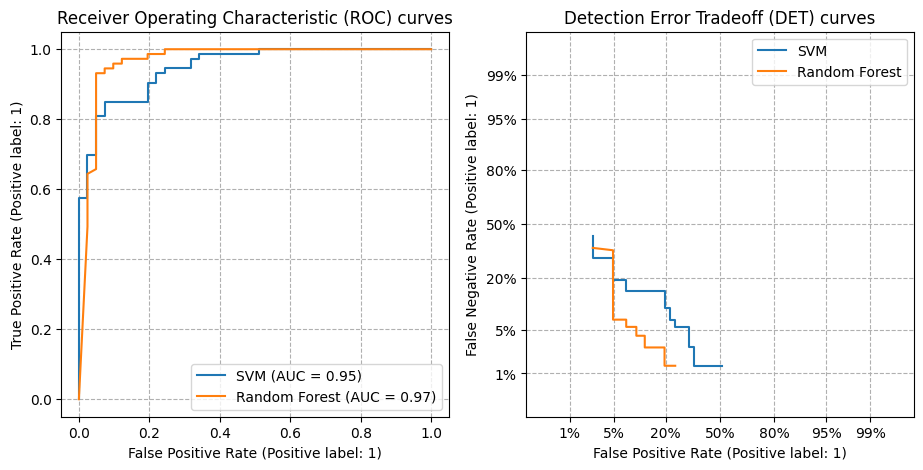

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

# Obtenemos dos gráficas para las curvas ROC y DET
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

# Recorremos cada clasificador y obtenemos sus curvas tipo ROC y DET
for name, clf in classifiers.items():
    # Entrenamos el clasificador con los datos de entrenamiento
    clf.fit(X_train, y_train)

    # Agregamos la curva tipo ROC con los datos de prueba
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
    # Agregamos la curva tipo DET con los datos de prueba
    DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)

# Ponemos los títulos de cada gráfica
ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

# Definimos el tipo de líneas
ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

# Mostramos las gráficas
plt.legend()
plt.show()

## Reconocimiento de imágenes con Máquinas de Vectores de Soporte

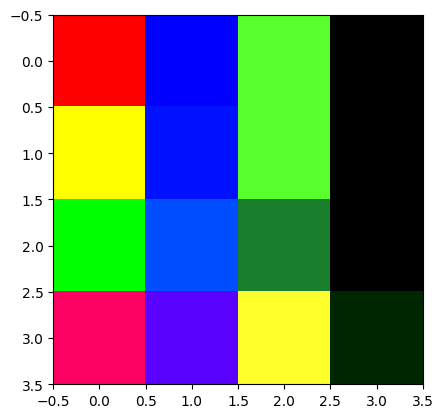

In [14]:
import numpy as np

mat = np.array([
    [[255, 0, 0], [0, 0, 255], [89, 255, 44], [0, 0, 0]],
    [[255, 255, 0], [0, 17, 255], [89, 255, 44], [0, 0, 0]],
    [[0, 255, 0], [0, 78, 255], [25, 127, 44], [0, 0, 0]],
    [[255, 0, 99], [89, 0, 255], [255, 255, 44], [0, 38, 0]],
])

import matplotlib.pyplot as plt

plt.imshow(mat)

In [23]:
mat.reshape(-1)

array([255,   0,   0,   0,   0, 255,  89, 255,  44,   0,   0,   0, 255,
       255,   0,   0,  17, 255,  89, 255,  44,   0,   0,   0,   0, 255,
         0,   0,  78, 255,  25, 127,  44,   0,   0,   0, 255,   0,  99,
        89,   0, 255, 255, 255,  44,   0,  38,   0])

In [11]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Muestras:                  %d" % n_samples)
print("Imagen:                    %dx%d" % (h, w))
print("Características:           %d" % n_features)
print("Clases:                    %d" % n_classes)

Muestras:                  1288
Imagen:                    50x37
Características:           1850
Clases:                    7


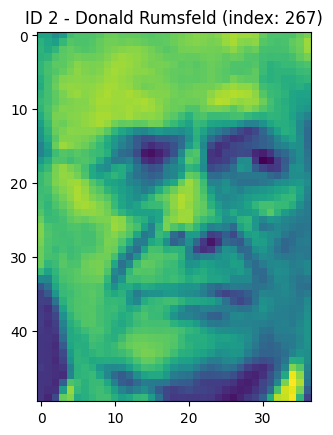

In [25]:
import matplotlib.pyplot as plt
import numpy as np

index = np.random.randint(0, n_samples)

plt.imshow(lfw_people.images[index])

people_id =  lfw_people.target[index]
people_name = lfw_people.target_names[people_id]

plt.title("ID %d - %s (index: %d)" % (people_id, people_name, index))

plt.show()

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((966, 1850), (322, 1850), (966,), (322,))

In [31]:
from sklearn.svm import SVC

clf = SVC()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.7453416149068323

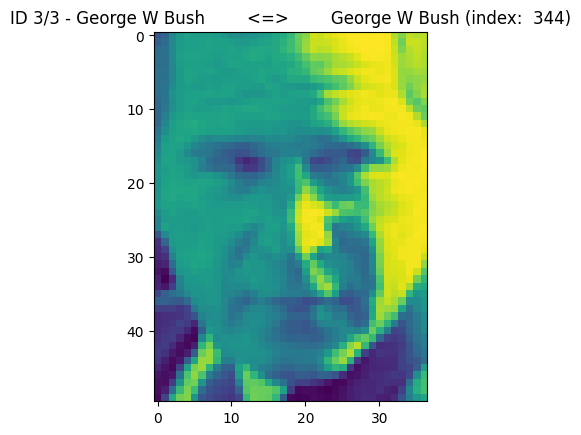

                   >>>     PREDICCIÓN CORRECTA     <<<


In [37]:
import matplotlib.pyplot as plt
import numpy as np

index = np.random.randint(0, n_samples)

plt.imshow(lfw_people.images[index])

people_id =  lfw_people.target[index]
people_name = lfw_people.target_names[people_id]

people_id_predict = clf.predict([X[index]])[0]
people_name_predict = lfw_people.target_names[people_id_predict]

plt.title("ID %1d/%1d - %-20s <=> %20s (index: %4d)" % (people_id, people_id_predict,
                                                people_name,
                                                people_name_predict, index))

plt.show()

if people_id == people_id_predict:
  print("                   >>>     PREDICCIÓN CORRECTA     <<<")
else:
  print("                   >>>      PREDICCIÓN FALLIDA     <<<")

## Clasificación de texto con Naive Bayes

[https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset](https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset)

In [50]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train')

newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
newsgroups_train.filenames.shape

(11314,)

In [ ]:
newsgroups_train.target.shape

(11314,)

In [ ]:
newsgroups_train.target[:10]

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

In [ ]:
cats = ['alt.atheism', 'sci.space']

newsgroups_train = fetch_20newsgroups(subset='train', categories=cats)

newsgroups_train.target[:10]

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ['alt.atheism', 'talk.religion.misc',
              'comp.graphics', 'sci.space']

newsgroups_train = fetch_20newsgroups(subset='train',
                                      categories=categories)

vectorizer = TfidfVectorizer()

vectors = vectorizer.fit_transform(newsgroups_train.data)

vectors.shape

(2034, 34118)

In [59]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=.01)

clf.fit(vectors, newsgroups_train.target)

MultinomialNB(alpha=0.01)

In [60]:
newsgroups_test = fetch_20newsgroups(subset='test',
                                     categories=categories)

vectors_test = vectorizer.transform(newsgroups_test.data)

vectors_test.shape

(1353, 34118)

In [61]:
from sklearn.metrics import classification_report

pred = clf.predict(vectors_test)

print(classification_report(newsgroups_test.target, pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       319
           1       0.95      0.95      0.95       389
           2       0.91      0.96      0.93       394
           3       0.85      0.76      0.80       251

    accuracy                           0.89      1353
   macro avg       0.89      0.88      0.88      1353
weighted avg       0.89      0.89      0.89      1353



In [ ]:
cat = newsgroups_test.target[0]
label = newsgroups_test.target_names[cat]
text = newsgroups_test.data[0]

cat, label, text

(2,
 'sci.space',
 'From: prb@access.digex.net (Pat)\nSubject: Re: Near Miss Asteroids (Q)\nOrganization: Express Access Online Communications, Greenbelt, MD USA\nLines: 4\nDistribution: sci\nNNTP-Posting-Host: access.digex.net\n\n\nTRry the SKywatch project in  Arizona.\n\npat\n')

In [ ]:
cat = newsgroups_test.target[1]
label = newsgroups_test.target_names[cat]
text = newsgroups_test.data[1]

cat, label, text

(1,
 'comp.graphics',
 'From: ing1023@ee.up.ac.za (ING1023)\nSubject: Vatican library\nOrganization: Electrical and Computer Engineering, University of Pretoria\nLines: 8\nNNTP-Posting-Host: mccartney.ee.up.ac.za\n\n\n\n The Vatican library recently made a tour of the US.\n Can anyone help me in finding a FTP site where this collection is \n available.\n\n Thanx in advance\n J. Watson\n')

In [ ]:
cat = newsgroups_test.target[2]
label = newsgroups_test.target_names[cat]
text = newsgroups_test.data[2]

cat, label, text

(1,
 'comp.graphics',
 'From: Zheng Wang <zw10+@andrew.cmu.edu>\nSubject: help\nOrganization: Sponsored account, Physics, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po2.andrew.cmu.edu\n\nHi there,\n\nI am here looking for some help.\n\nMy friend is a interior decor designer. He is from Thailand. He is\ntrying to find some graphics software on PC. Any suggestion on which\nsoftware to buy,where to buy and how much it costs ? He likes the most\nsophisticated \nsoftware(the more features it has,the better)\n\nThanks in advance\n\n')

In [78]:
vectors_sample = vectorizer.transform(np.array([
    "Express Access Online Communications, Greenbelt",
    "Can anyone help me in finding a FTP site where this collection is available. Thanx in advance",
    "He is trying to find some graphics software on PC. Any suggestion on which software to buy",
    "Hi, I need to buy a computer, can you help me?",
    "There are aliens and ufos in the north of the city",
    "I think God can help us",
    "My keyboard is broken",
    "The planet is so far",
    "This is close to apocallypsis",
    "I want to be your friend"
]))

vectors_sample.shape

(10, 34118)

In [79]:
import pandas as pd

pd.Series(clf.predict(vectors_sample)).map(lambda cat: newsgroups_test.target_names[cat])

0             sci.space
1         comp.graphics
2         comp.graphics
3         comp.graphics
4             sci.space
5           alt.atheism
6    talk.religion.misc
7             sci.space
8             sci.space
9         comp.graphics
dtype: object

In [67]:
newsgroups_test.target_names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

## Hipótesis del Titanic usando árboles de decisión

[https://towardsdatascience.com/a-beginners-guide-to-kaggle-s-titanic-problem-3193cb56f6ca](https://towardsdatascience.com/a-beginners-guide-to-kaggle-s-titanic-problem-3193cb56f6ca)

In [88]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

data.columns = ["ID", "SOBREVIVE", "CLASE", "NOMBRE", "SEXO",
                "EDAD", "HERMANOS", "PADRES_HIJOS", "TICKET", "TARIFA", "CABINA", "MUELLE"]

data.sample(5)

,ID,SOBREVIVE,CLASE,NOMBRE,SEXO,EDAD,HERMANOS,PADRES_HIJOS,TICKET,TARIFA,CABINA,MUELLE
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q
836,837,0,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,NaN,S
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S
418,419,0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,NaN,S


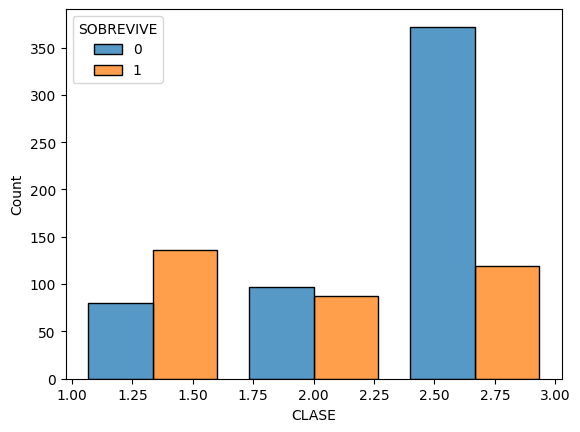

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=data, x="CLASE", hue="SOBREVIVE",
             multiple="dodge", shrink=0.8, bins=3)
plt.show()

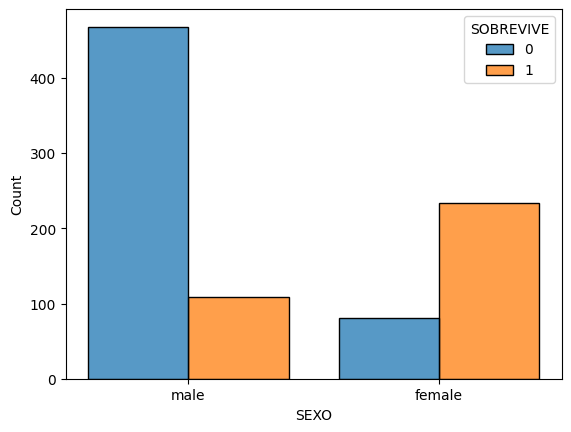

In [90]:
sns.histplot(data=data, x="SEXO", hue="SOBREVIVE",
             multiple="dodge", shrink=0.8, bins=2)
plt.show()

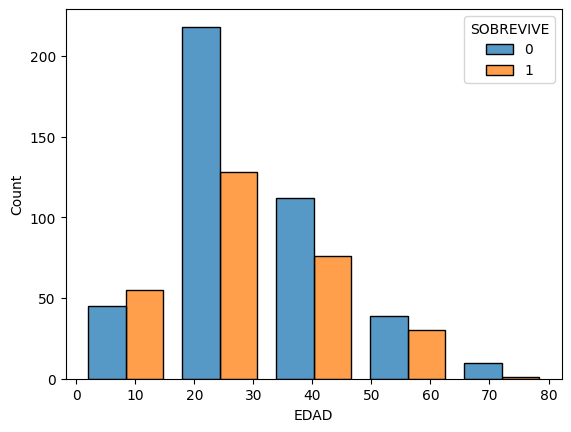

In [91]:
sns.histplot(data=data, x="EDAD", hue="SOBREVIVE",
             multiple="dodge", shrink=0.8, bins=5)
plt.show()

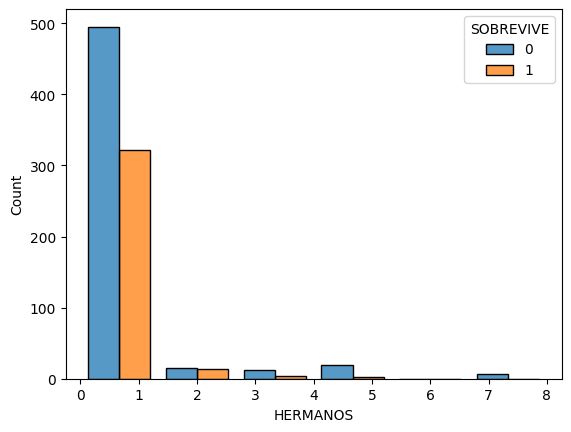

In [92]:
sns.histplot(data=data, x="HERMANOS", hue="SOBREVIVE",
             multiple="dodge", shrink=0.8, bins=6)
plt.show()

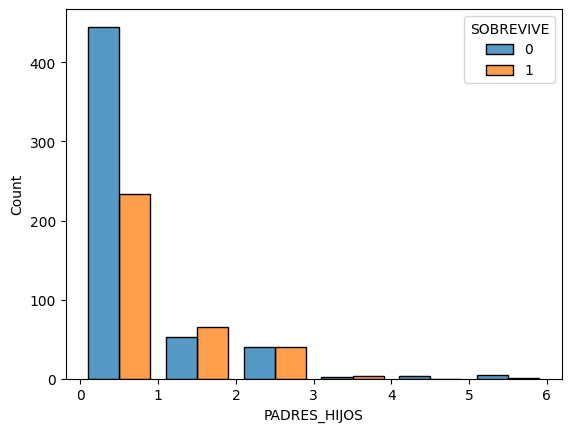

In [93]:
sns.histplot(data=data, x="PADRES_HIJOS", hue="SOBREVIVE",
             multiple="dodge", shrink=0.8, bins=6)
plt.show()

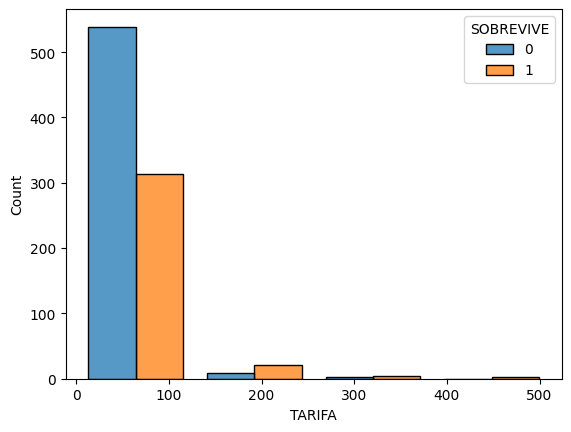

In [94]:
sns.histplot(data=data, x="TARIFA", hue="SOBREVIVE",
             multiple="dodge", shrink=0.8, bins=4)
plt.show()

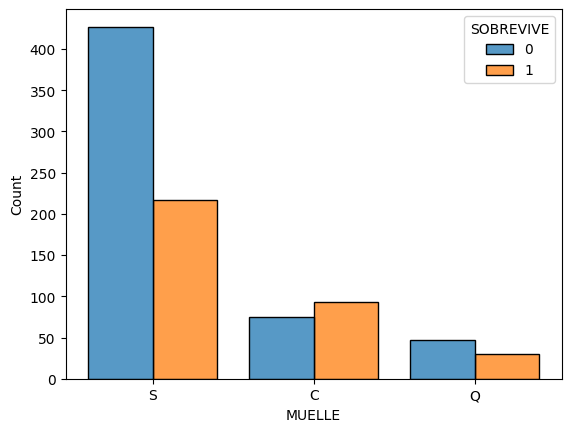

In [95]:
sns.histplot(data=data, x="MUELLE", hue="SOBREVIVE",
             multiple="dodge", shrink=0.8, bins=3)
plt.show()

In [96]:
data["MUJER"] = data["SEXO"].map({ "male": 0, "female": 1 })
data["FAMILIA"] = data["HERMANOS"] + data["PADRES_HIJOS"]
data["PARTIDA"] = data["MUELLE"].map({ "S": 0, "C": 1, "Q": 2 })

X = data[["EDAD", "MUJER", "FAMILIA", "TARIFA", "CLASE", "PARTIDA"]].fillna(0).values

y = data["SOBREVIVE"]

X[0], y[0]

(array([22.  ,  0.  ,  1.  ,  7.25,  3.  ,  0.  ]), 0)

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 6), (223, 6), (668,), (223,))

In [98]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.7802690582959642

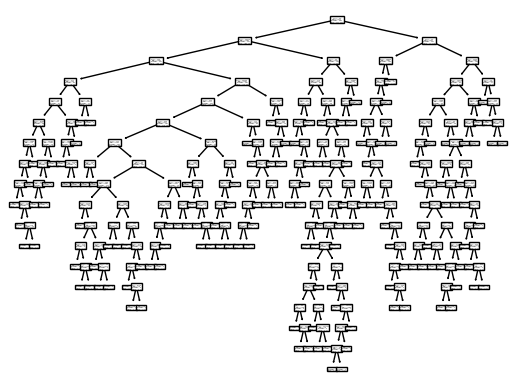

In [99]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(clf)

plt.show()

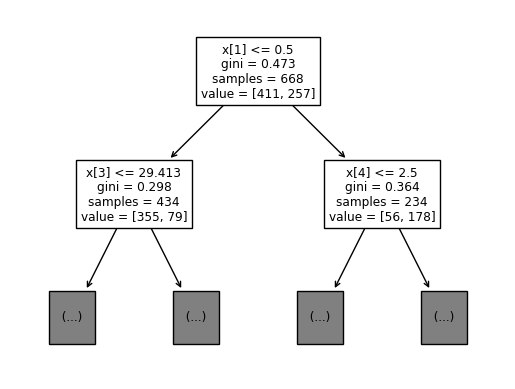

In [102]:
plot_tree(clf, max_depth=1)

plt.show()